In [101]:
import os

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
datadir1 = '/media/cjw/Data/cyto/mmFromTifs3/'
datadir2 = '/media/cjw/Data/cyto/mmNoComp/'

decoded1 = '/media/cjw/Data/cyto/decodedImages/set1.mm'
decoded2 = '/media/cjw/Data/cyto/decodedImages/set2.mm'

dmm1 = np.memmap(decoded1, dtype=np.float32, offset=0,
                 mode='r', shape=(30000, 32, 32, 4))

dmm2 = np.memmap(decoded2, dtype=np.float32, offset=0,
                 mode='r', shape=(30000, 32, 32, 4))

In [13]:
olist1 = sorted(os.listdir(datadir1))
olist2 = sorted(os.listdir(datadir2))

omm1 = [datadir1 + "/" + x for x in olist1]
omm2 = [datadir2 + "/" + x for x in olist2]

print(omm1, omm2)

['/media/cjw/Data/cyto/mmFromTifs3//Fish6_CCB.mm', '/media/cjw/Data/cyto/mmFromTifs3//Fish6_ICE.mm', '/media/cjw/Data/cyto/mmFromTifs3//Fish6_Untreated.mm'] ['/media/cjw/Data/cyto/mmNoComp//Fish6_CCB.mm', '/media/cjw/Data/cyto/mmNoComp//Fish6_ICE.mm', '/media/cjw/Data/cyto/mmNoComp//Fish6_untreated.mm']


In [65]:
ommz1 = list()
ommz2 = list()
for f in omm1:
    print(f)
    mm = np.memmap(f, dtype=np.float32, offset=128,
                 mode='r', shape=(10000, 64, 64, 5))
    ommz1.append(mm)
    
xmm1 = np.concatenate(ommz1)
print(xmm1.shape)
for f in omm2:
    mm = np.memmap(f, dtype=np.float32, offset=128,
                 mode='r', shape=(10000, 64, 64, 5))
    ommz2.append(mm)

xmm2 = np.concatenate(ommz2)
print(xmm2.shape)
mm1 = xmm1[:,16:48, 16:48, [0,1,3,4]]
mm2 = xmm2[:,16:48, 16:48, [0,1,3,4]]

mm1.shape, mm2.shape

/media/cjw/Data/cyto/mmFromTifs3//Fish6_CCB.mm
/media/cjw/Data/cyto/mmFromTifs3//Fish6_ICE.mm
/media/cjw/Data/cyto/mmFromTifs3//Fish6_Untreated.mm
(30000, 64, 64, 5)
(30000, 64, 64, 5)


((30000, 32, 32, 4), (30000, 32, 32, 4))

In [221]:
t=20037
c = 0
sns.set_style("whitegrid", {'axes.grid' : False})

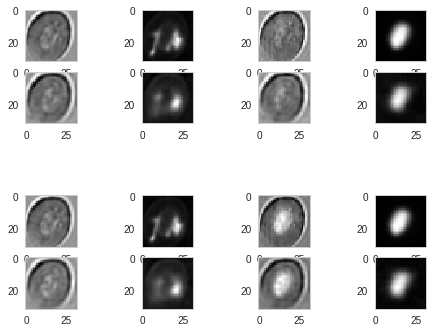

2.252
2.27273
1.67063
6.30516
20129


In [333]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.subplot(5,4,1)
plt.imshow(mm1[t,:,:,0], cmap='gray')
plt.subplot(5,4,2)
plt.imshow(mm1[t,:,:,1], cmap='gray')
plt.subplot(5,4,3)
plt.imshow(mm1[t,:,:,2], cmap='gray')
plt.subplot(5,4,4)
plt.imshow(mm1[t,:,:,3], cmap='gray')

# plt.subplot(4,2,3)
# plt.imshow(dmm1[t,:,:,c], cmap='gray')
# plt.subplot(4,2,4)
# plt.imshow(dmm1[t,:,:,c + 2], cmap='gray')
plt.subplot(5,4,5)
plt.imshow(dmm1[t,:,:,0], cmap='gray')
plt.subplot(5,4,6)
plt.imshow(dmm1[t,:,:,1], cmap='gray')
plt.subplot(5,4,7)
plt.imshow(dmm1[t,:,:,2], cmap='gray')
plt.subplot(5,4,8)
plt.imshow(dmm1[t,:,:,3], cmap='gray')


plt.subplot(5,4,13)
plt.imshow(mm2[t,:,:,0], cmap='gray')
plt.subplot(5,4,14)
plt.imshow(mm2[t,:,:,1], cmap='gray')
plt.subplot(5,4,15)
plt.imshow(mm2[t,:,:,2], cmap='gray')
plt.subplot(5,4,16)
plt.imshow(mm2[t,:,:,3], cmap='gray')

plt.subplot(5,4,17)
plt.imshow(dmm2[t,:,:,0], cmap='gray')
plt.subplot(5,4,18)
plt.imshow(dmm2[t,:,:,1], cmap='gray')
plt.subplot(5,4,19)
plt.imshow(dmm2[t,:,:,2], cmap='gray')
plt.subplot(5,4,20)
plt.imshow(dmm2[t,:,:,3], cmap='gray')
plt.show()

m1 = mm1[t]
m2 = mm2[t]
i1 = dmm1[t]
i2 = dmm2[t]

print(np.sum(np.square(m1-i1)))
print(np.sum(np.square(m2-i2)))
print(np.sum(np.square(m1[:,:,0]-m1[:,:,2])))
print(np.sum(np.square(m2[:,:,0]-m2[:,:,2])))
print(t)
t += 1

In [199]:
losses1 = list()
losses2 = list()

b1 = np.sum(np.square(mm1 - dmm1), axis=(1,2,3))
b2 = np.sum(np.square(mm2 - dmm2), axis=(1,2,3))

df = pd.DataFrame(data={"Comp":b1, "UComp":b2})

8336 6.12358


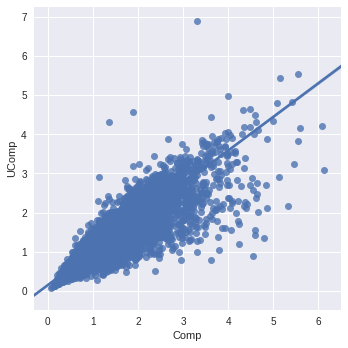

In [116]:
sns.lmplot(data=df, x='Comp', y='UComp')
plt.show()

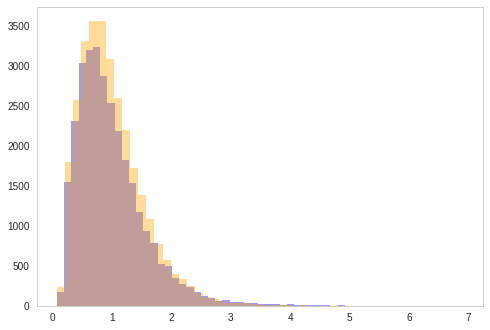

In [210]:
sns.distplot(b1, bins=50, kde=False, hist=True, color='blue')
sns.distplot(b2, bins=50, kde=False,hist=True, color='orange')
plt.show()

In [205]:
b1.shape

(30000,)

In [297]:
c7diff1 = np.sum(np.square(mm1[:,:,:,0] - mm1[:,:,:,2]), axis=(1,2))
c7diff2 = np.sum(np.square(mm2[:,:,:,0] - mm2[:,:,:,2]), axis=(1,2))

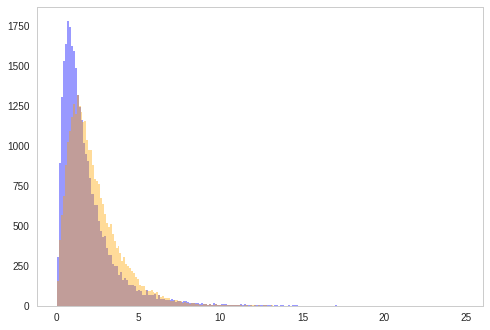

In [298]:
sns.distplot(c7diff1, bins=200, kde=False,hist=True, color='blue')
sns.distplot(c7diff2, bins=200, kde=False,hist=True, color='orange')
plt.show()